<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision EXP 7

Chintan Ruparel

C086

C1

Aim  : Use Mean Shift algorithm to track an object in the give video



In [39]:
#For mathematical caculations.
import numpy as np

#To plot the image.
import matplotlib.pyplot as plt

#Computer vision version 2.
import cv2

In [40]:
frames = []
no_frames = 0
cap = cv2.VideoCapture('/content/humans.avi')

#r is return and f is frame
#cap.read will read the frames of the video. and return r and f. r will be false when it reaches the last frame

while True:
  r,f = cap.read()
  if f is not None:
    frames.append(f)
    no_frames += 1
  else:
    break

In [41]:
no_frames

795

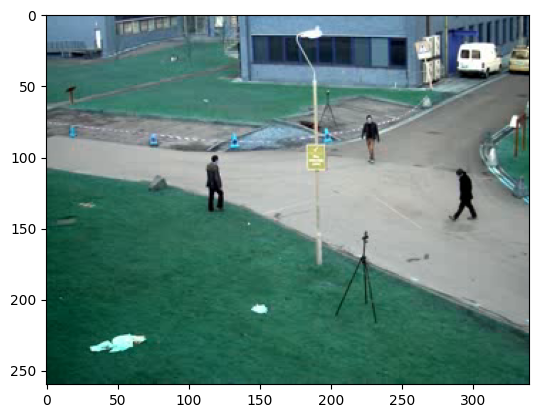

In [42]:
plt.imshow(frames[0])

In [43]:
cap = cv2.VideoCapture('/content/humans.avi')
ret,frame = cap.read()

# Define the region of interest (ROI) coordinates
x,y,w,h = 210,70,30,50
window = (x,y,w,h)

# Create the ROI (window) by slicing the frame using NumPy indexing
roi = frame[y:y+h,x:x+w]

# Convert the ROI to HSV color space (optional, based on your specific needs)
h_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# To focus only on some part of ROI, take each pixel of roi and then check if it is lying between the lowest and highest range in Hue and saturation (Colors are represented in angles in HSV)
mask = cv2.inRange(h_roi, np.array((0,60,32)),np.array((180,255,255)))

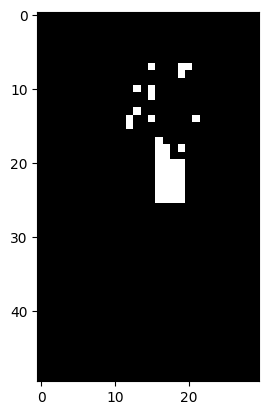

In [44]:
plt.imshow(mask,cmap='gray')

In [45]:
# Calculate the histogram of the hue channel in the ROI
# Focus on the 0th channel (hue) of the HSV image h_roi
# Use a mask to include only relevant pixels
# Create a histogram with 180 bins, ranging from 0 to 180 for hue values
roi_hist = cv2.calcHist([h_roi], [0], mask, [180], [0, 180])

# Define termination criteria for iterative backprojection or tracking
# Use either a sufficient number of iterations (10) or an error threshold (EPS)
# Check for convergence every 1 iteration
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

cap = cv2.VideoCapture('/content/humans.avi')
frames = []

In [46]:
for i in  range(1,no_frames):
  ret,frame = cap.read()
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
  r,window = cv2.meanShift(dst,window,term_crit)
  x,y,w,h = window
  image_track = cv2.rectangle(frame,(x,y),(x+w,y+h),255,2)
  frames.append(image_track)

In [47]:
len(frames)

794

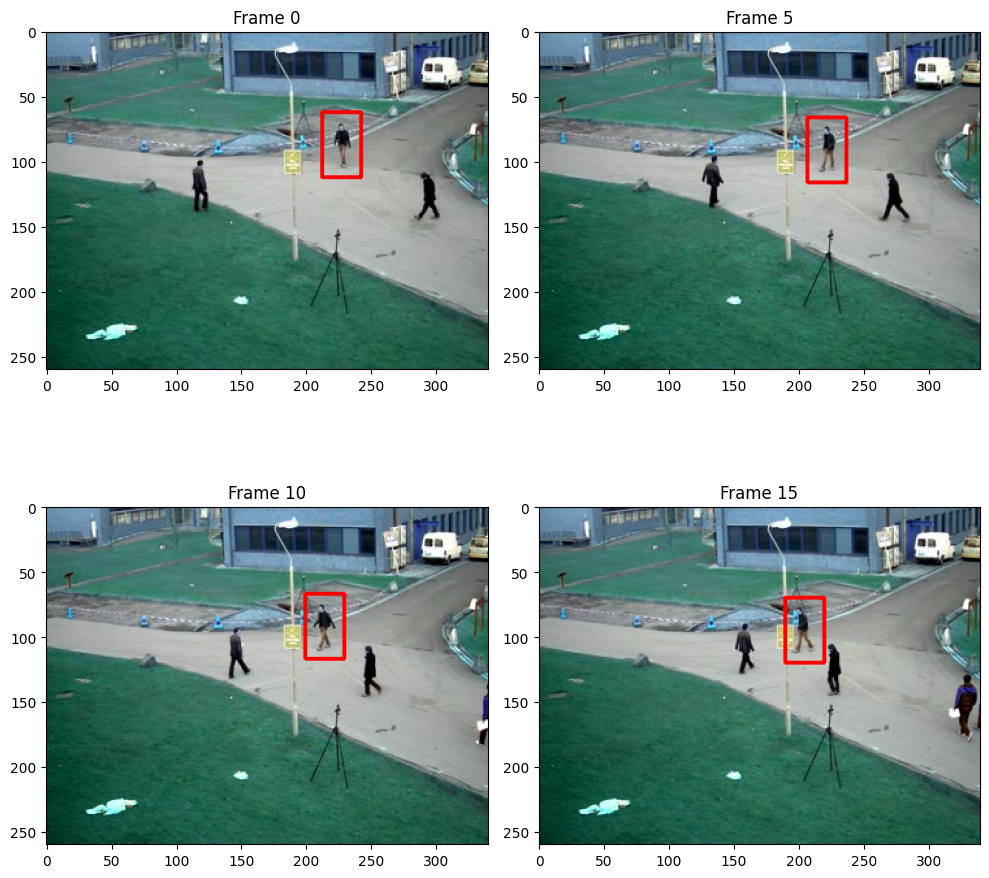

In [48]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(frames[0])
plt.title("Frame 0")

plt.subplot(2,2,2)
plt.imshow(frames[5])
plt.title("Frame 5")

plt.subplot(2,2,3)
plt.imshow(frames[10])
plt.title("Frame 10")

plt.subplot(2,2,4)
plt.imshow(frames[15])
plt.title("Frame 15")

plt.tight_layout()